<a href="https://colab.research.google.com/github/zainbsuliman/VGRs/blob/main/Graduation_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and show

In [ ]:
df = pd.read_csv('user Dataset.csv', header=None, index_col=None, names=['user', 'game', 'purchase_play', 'hours', 'other'])
df

,user,game,purchase_play,hours,other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user           200000 non-null  int64  
 1   game           200000 non-null  object 
 2   purchase_play  200000 non-null  object 
 3   hours          200000 non-null  float64
 4   other          200000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [ ]:
print("Number of games : {0}".format(len(df.game.unique())))
print("Number of users : {0}".format(len(df.user.unique())))

Number of games : 5155
Number of users : 12393


# Data cleaning


In [ ]:
df.drop(['other'], inplace=True, axis=1)
df

,user,game,purchase_play,hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [ ]:
print("prior shape: ", df.isnull().any().any())
df.dropna(how='any', inplace=True)
print("post shape: ", df.shape)

prior shape:  False
post shape:  (200000, 4)


In [ ]:
df.drop_duplicates(subset=['user','game','purchase_play'], keep='first', inplace=True)
df.head

<bound method NDFrame.head of              user                        game purchase_play  hours
0       151603712  The Elder Scrolls V Skyrim      purchase    1.0
1       151603712  The Elder Scrolls V Skyrim          play  273.0
2       151603712                   Fallout 4      purchase    1.0
3       151603712                   Fallout 4          play   87.0
4       151603712                       Spore      purchase    1.0
...           ...                         ...           ...    ...
199995  128470551                 Titan Souls          play    1.5
199996  128470551  Grand Theft Auto Vice City      purchase    1.0
199997  128470551  Grand Theft Auto Vice City          play    1.5
199998  128470551                        RUSH      purchase    1.0
199999  128470551                        RUSH          play    1.4

[199281 rows x 4 columns]>

In [ ]:
print ("Number of rows dropped : ",200000-199281)

print("Number of games : {0}".format(len(df.game.unique())))
print("Number of users : {0}".format(len(df.user.unique())))

Number of rows dropped :  719
Number of games : 5155
Number of users : 12393


# spliting purchase play column

In [ ]:
def purchase_split(data):
    if data['purchase_play'] == 'purchase':
        return 1
    else:
        return 0

def play_split(data):
    if data['purchase_play'] == 'play':
        return 1
    else:
        return 0

def play_hours_split(data):
    return data['hours'] - data['purchase']


In [ ]:
df['purchase'] = df.apply (lambda data: purchase_split(data), axis=1)
df['play'] = df.apply (lambda data: play_split(data), axis=1)
df['hours'] = df.apply (lambda data: play_hours_split(data), axis=1)
df_cleaned = df.groupby(['user','game']).sum().reset_index()

In [ ]:
df_cleaned.head()

,user,game,hours,purchase,play
0,5250,Alien Swarm,4.9,1,1
1,5250,Cities Skylines,144.0,1,1
2,5250,Counter-Strike,0.0,1,0
3,5250,Counter-Strike Source,0.0,1,0
4,5250,Day of Defeat,0.0,1,0


In [ ]:
print("Number of games : {0}".format(len(df_cleaned.game.unique())))
print("Number of users : {0}".format(len(df_cleaned.user.unique())))

Number of games : 5155
Number of users : 12393


# Data exploration

In [ ]:
game_total_users=pd.DataFrame(df_cleaned.groupby(df_cleaned['game'])['user'].count())
game_total_hrs = df_cleaned.groupby(by='game')['hours'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20]

In [ ]:

game_freq = df_cleaned.groupby(by='game').agg({'user': 'count', 'hours': 'sum'}).reset_index()
top10user = game_freq.sort_values(by='user',ascending=False)[:10].reset_index()

top10user['hours'] = top10user['hours'].round(0)
top10user['hours'] = top10user['hours'].astype(int)

print(top10user)

   index                             game  user   hours
0   1336                           Dota 2  4841  981685
1   4257                  Team Fortress 2  2323  173673
2   4788                         Unturned  1563   16096
3    981  Counter-Strike Global Offensive  1412  322772
4   2074           Half-Life 2 Lost Coast   981     184
5    984            Counter-Strike Source   978   96076
6   2475                    Left 4 Dead 2   951   33597
7    978                   Counter-Strike   856  134261
8   4899                         Warframe   847   27075
9   2071           Half-Life 2 Deathmatch   823    3713


In [ ]:
top10hours = game_freq.sort_values(by='hours',ascending=False)[:10].reset_index()

top10hours['hours'] = top10hours['hours'].round(0)
top10hours['hours'] = top10hours['hours'].astype(int)

print(top10hours)

   index                                         game  user   hours
0   1336                                       Dota 2  4841  981685
1    981              Counter-Strike Global Offensive  1412  322772
2   4257                              Team Fortress 2  2323  173673
3    978                               Counter-Strike   856  134261
4   3825                   Sid Meier's Civilization V   596   99821
5    984                        Counter-Strike Source   978   96076
6   4364                   The Elder Scrolls V Skyrim   717   70889
7   1894                                  Garry's Mod   731   49725
8    737  Call of Duty Modern Warfare 2 - Multiplayer   343   42010
9   2475                                Left 4 Dead 2   951   33597


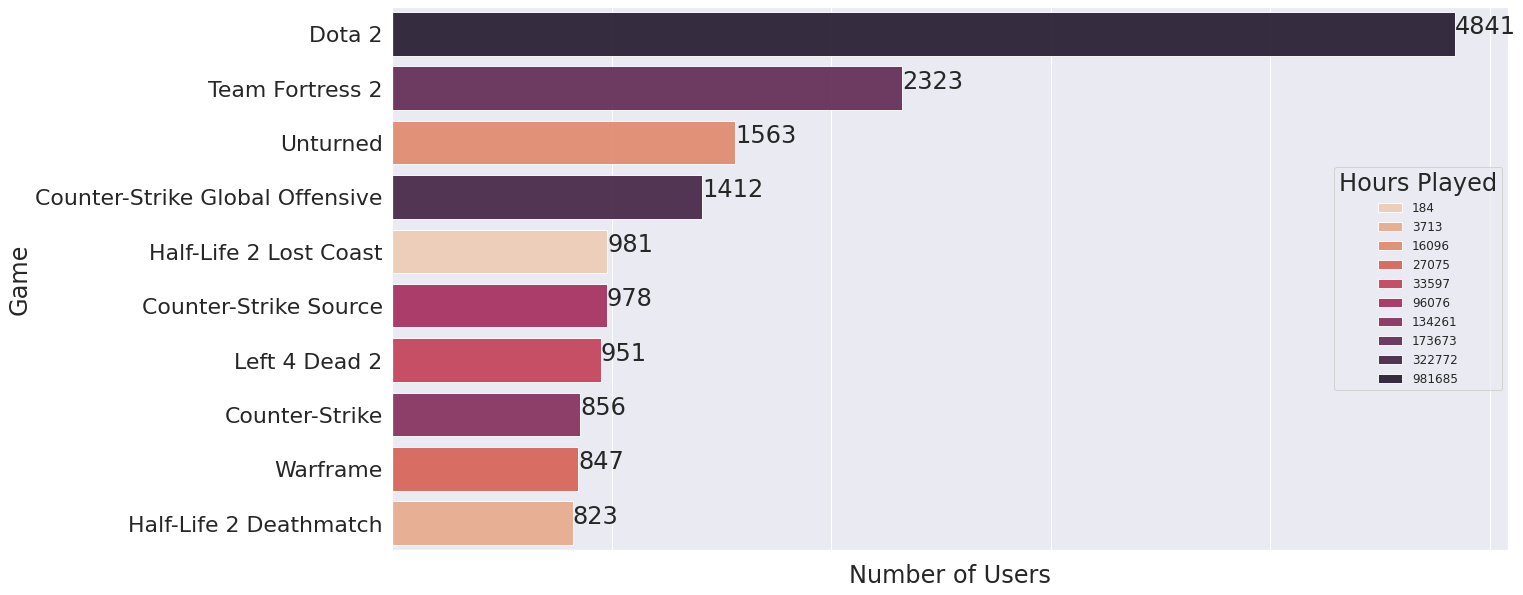

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='user', y='game', hue='hours',alpha=0.9,data=top10user, palette='rocket_r',dodge=False)
ax.set(xlabel='Number of Users', ylabel='Game')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(fontsize=12, title='Hours Played')
for index, value in enumerate(top10user.user):
    plt.text(value, index, str(value))
plt.show()

In [ ]:

df_cleaned.groupby(df_cleaned['game'])['hours'].sum().sort_values(ascending=False).head(10)

game
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Name: hours, dtype: float64

In [ ]:
df_hours=df_cleaned[df_cleaned['game'].isin(['Dota 2','Counter-Strike Global Offensive','Team Fortress 2',
                                             'Counter-Strike',"Sid Meier's Civilization V",'Counter-Strike Source',
                                             'The Elder Scrolls V Skyrim',"Garry's Mod",
                                             'Call of Duty Modern Warfare 2 - Multiplayer','Left 4 Dead 2'])]
df_hours

,user,game,hours,purchase,play
2,5250,Counter-Strike,0.0,1,0
3,5250,Counter-Strike Source,0.0,1,0
7,5250,Dota 2,0.2,1,1
19,5250,Team Fortress 2,0.8,1,1
30,76767,Call of Duty Modern Warfare 2 - Multiplayer,165.0,1,1
...,...,...,...,...,...
128788,309262440,Team Fortress 2,1.2,1,1
128794,309404240,Team Fortress 2,2.2,1,1
128797,309434439,Dota 2,0.8,1,1
128802,309824202,Dota 2,0.7,1,1


In [ ]:
df_hours['game'] = pd.Categorical(df_hours['game'],  ['Dota 2','Counter-Strike Global Offensive',
                                                      'Team Fortress 2','Counter-Strike',"Sid Meier's Civilization V",
                                                      'Counter-Strike Source', 'The Elder Scrolls V Skyrim',
                                                      "Garry's Mod",'Call of Duty Modern Warfare 2 - Multiplayer',
                                                      'Left 4 Dead 2'])
df_hours = df_hours.sort_values("game")

<ipython-input-50-6b47af656412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['game'] = pd.Categorical(df_hours['game'],  ['Dota 2','Counter-Strike Global Offensive',


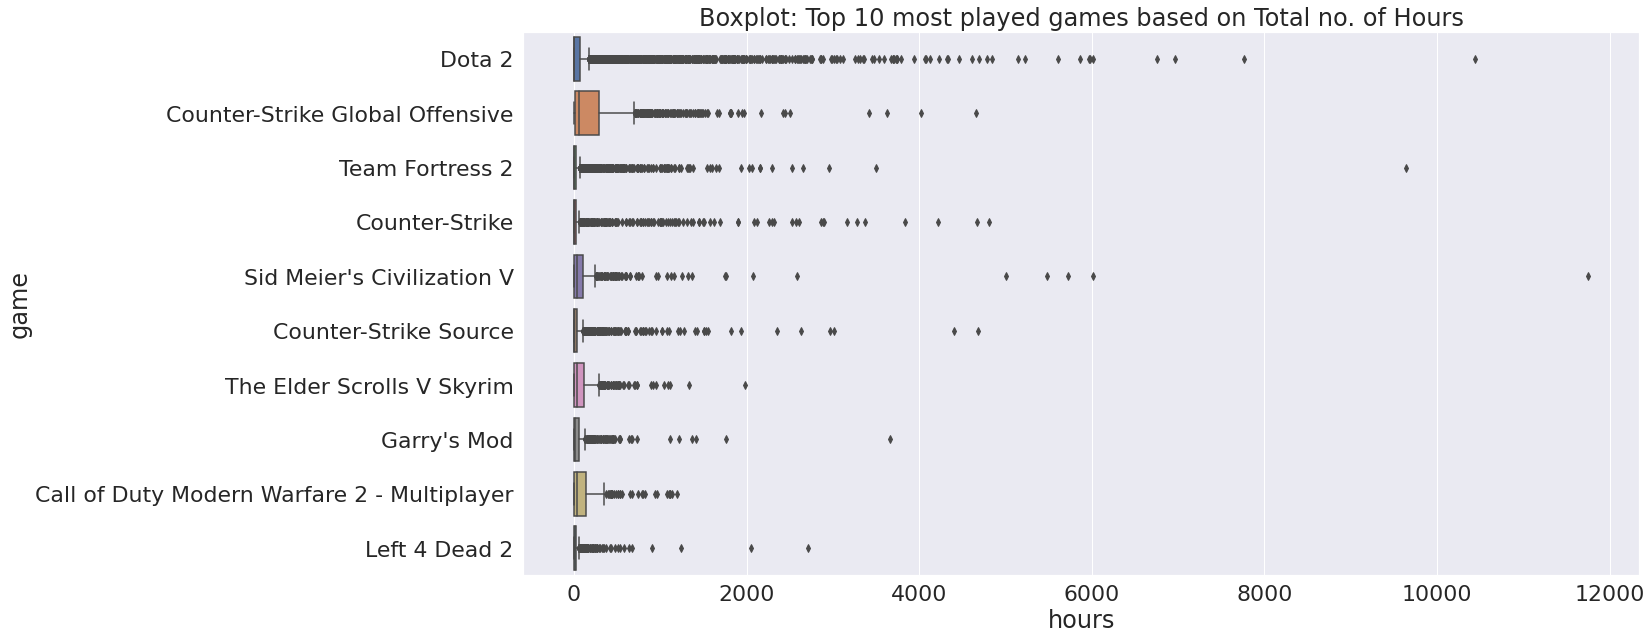

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Boxplot: Top 10 most played games based on Total no. of Hours')
sns.boxplot(data=df_hours, x=df_hours.hours,y=df_hours.game)
plt.show()

In [ ]:
print("Total game purchases : {0}".format(len(df_cleaned.loc[df_cleaned['purchase'] == 1])))
print("Total game plays : {0}".format(len(df_cleaned.loc[df_cleaned['play'] == 1])))
print("Number of purchased games not played : {0}".format((len(df_cleaned.loc[df_cleaned['purchase'] == 1]))-(len(df_cleaned.loc[df_cleaned['play'] == 1]))))
user_filter=((df_cleaned["play"]==0))
print("Number of users who purchased game without playing: {0}".format(df_cleaned[user_filter]["user"].nunique()))

Total game purchases : 128804
Total game plays : 70477
Number of purchased games not played : 58327
Number of users who purchased game without playing: 5953


In [ ]:
df_cleaned.to_csv ('steam-cleaned.csv', index = False, header=True)

# ALS

In [ ]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import pandas as pd
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
import random
from sklearn.preprocessing import MinMaxScaler
import implicit

In [ ]:
df = pd.read_csv('steam-cleaned.csv')
df = df.drop(['purchase','play'], axis=1)
df

,user,game,hours
0,5250,Alien Swarm,4.9
1,5250,Cities Skylines,144.0
2,5250,Counter-Strike,0.0
3,5250,Counter-Strike Source,0.0
4,5250,Day of Defeat,0.0
...,...,...,...
128799,309626088,Age of Empires II HD Edition,6.7
128800,309812026,Counter-Strike Nexon Zombies,0.0
128801,309812026,Robocraft,0.0
128802,309824202,Dota 2,0.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128804 entries, 0 to 128803
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    128804 non-null  int64  
 1   game    128804 non-null  object 
 2   hours   128804 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ MB


In [ ]:
data = df.dropna()
data = df.copy()

In [ ]:
data['user'] = data['user'].astype("category")
data['game'] = data['game'].astype("category")
data['user_id'] = data['user'].cat.codes
data['game_id'] = data['game'].cat.codes
data

,user,game,hours,user_id,game_id
0,5250,Alien Swarm,4.9,0,227
1,5250,Cities Skylines,144.0,0,852
2,5250,Counter-Strike,0.0,0,978
3,5250,Counter-Strike Source,0.0,0,984
4,5250,Day of Defeat,0.0,0,1131
...,...,...,...,...,...
128799,309626088,Age of Empires II HD Edition,6.7,12389,174
128800,309812026,Counter-Strike Nexon Zombies,0.0,12390,982
128801,309812026,Robocraft,0.0,12390,3562
128802,309824202,Dota 2,0.7,12391,1336


In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=7c97f6763a27227db0361576b76c08d6d6b5098616af665d70d00fac6b48bcfe
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Recommendation_system').getOrCreate()


In [ ]:
data = spark.createDataFrame(data)

In [ ]:
(train, test) = data.randomSplit([0.8, 0.2])

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

In [ ]:
als = ALS(seed = 123, implicitPrefs=True, nonnegative = True,
          userCol="user_id", itemCol="game_id", ratingCol="hours",coldStartStrategy="drop")

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Add hyperparameters and their respective values to param_grid

param_grid = ParamGridBuilder() \
            .addGrid(als.rank, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) \
            .addGrid(als.regParam, [.01, .05, .1, .15]) \
            .addGrid(als.maxIter, [5, 10, 15, 20])  \
            .build()

In [ ]:
evaluator = RegressionEvaluator(
           metricName="rmse",
           labelCol="hours",
           predictionCol="prediction")

print ("Num models to be tested: ", len(param_grid))

Num models to be tested:  160


In [ ]:
model=als.fit(train)

In [ ]:
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName='rmse', labelCol='hours', predictionCol='prediction')
rmse = evaluator.evaluate(predictions)
print(rmse)

154.17577290173756


In [ ]:
gameRecs = model.recommendForAllItems(10)
gameRecs.show(truncate = False)

+-------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|game_id|recommendations                                                                                                                                                                                                       |
+-------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|1      |[{2860, 0.010241998}, {211, 0.010022516}, {148, 0.009593716}, {863, 0.009518381}, {1729, 0.00939035}, {1360, 0.009305331}, {1646, 0.009266163}, {728, 0.009169087}, {1078, 0.009074945}, {1853, 0.008956641}]         |
|3      |[{191, 0.017595386}, {4162, 0.01725889}, {1729, 0.017005095}, {532, 0.016988512}, {211, 0.0

In [ ]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
model.save("als_model")

In [ ]:
from pyspark.ml.recommendation import ALSModel
# Load the saved model
model = ALSModel.load("als_model")

In [ ]:
from pyspark.sql.functions import col

# Create DataFrame with single user ID
user_id = 11
user_df = spark.createDataFrame([(user_id,)], ["user_id"])

# Make recommendations for user
recommendations = model.recommendForUserSubset(user_df, 10)

# Print recommendations for user
recommendations.show(truncate=False)

+-------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|user_id|recommendations                                                                                                                                                                               |
+-------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|11     |[{984, 0.9839202}, {981, 0.7949114}, {3825, 0.7566307}, {4364, 0.7478398}, {1894, 0.64319694}, {4276, 0.6393853}, {2475, 0.6120698}, {1133, 0.5921554}, {1978, 0.56436497}, {736, 0.51941735}]|
+-------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

train

# New Section

prapere dataset for content based

In [ ]:
import re
import pandas as pd
import pathlib

In [ ]:
dataGames=pd.read_csv('steam_games.csv')
dataGames

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

In [ ]:
for i, row in dataGames.iterrows():
    if type(row["all_reviews"]) == str:

        # extract % of positive reviews
        x = re.findall(r'- [0,1,2,3,4,5,6,7,8,9]*%', row["all_reviews"])
        if len(x) != 0:
            dataGames.at[i, 'percentage_positive_review'] = x[0].translate({ord(i): None for i in '- %'})

        # extract qualification of reviews
        reviewParse = row["all_reviews"].split(",")
        if 'user reviews' in reviewParse[0]:
            dataGames.at[i, 'review_qualification'] = ""
        else:
            dataGames.at[i, 'review_qualification'] = reviewParse[0]

In [ ]:
steam_games_reviews=dataGames

In [ ]:
steam_games_reviews=dataGames[["name", "percentage_positive_review", "review_qualification", "all_reviews"]]

In [ ]:
steam_games_reviews.head(5)

,name,percentage_positive_review,review_qualification,all_reviews
0,DOOM,92,Very Positive,"Very Positive,(42,550),- 92% of the 42,550 use..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,Mixed,"Mixed,(836,608),- 49% of the 836,608 user revi..."
2,BATTLETECH,71,Mostly Positive,"Mostly Positive,(7,030),- 71% of the 7,030 use..."
3,DayZ,61,Mixed,"Mixed,(167,115),- 61% of the 167,115 user revi..."
4,EVE Online,74,Mostly Positive,"Mostly Positive,(11,481),- 74% of the 11,481 u..."


train and test

In [ ]:
import pandas as pd

In [ ]:
dataUsers = pd.read_csv('steam-cleaned.csv')
dataUsers.head(5)

,user,game,hours,purchase,play
0,5250,Alien Swarm,4.9,1,1
1,5250,Cities Skylines,144.0,1,1
2,5250,Counter-Strike,0.0,1,0
3,5250,Counter-Strike Source,0.0,1,0
4,5250,Day of Defeat,0.0,1,0


In [ ]:
# get 20% of random elements (combination user-game) for test dataset
testUsers = dataUsers.sample(frac=0.2, replace=False)

# get the remaining elements for training dataset
trainUsers = dataUsers[~dataUsers.isin(testUsers)].dropna()

In [ ]:
# output csv
testUsers.to_csv('steam_user_test.csv'), index=False)
trainUsers.to_csv('steam_user_train.csv'), index=False)

SyntaxError: ignored

# Content based

In [ ]:
import re
import pandas as pd
import pathlib

preprocessing for content based algorithm

In [ ]:
data=pd.read_csv('steam_games.csv')
data_user= pd.read_csv('steam-cleaned.csv')
data

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

In [ ]:
dataGames = pd.read_csv('steam_games.csv',
                     usecols=["name", "genre", "game_details", "popular_tags", "publisher", "developer"])
dataGames

,name,developer,publisher,popular_tags,game_details,genre
0,DOOM,id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...",Action
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","Action,Adventure,Massively Multiplayer"
2,BATTLETECH,Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","Action,Adventure,Strategy"
3,DayZ,Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","Action,Adventure,Massively Multiplayer"
4,EVE Online,CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Action,Free to Play,Massively Multiplayer,RPG,..."
...,...,...,...,...,...,...
40828,Rocksmith® 2014 Edition – Remastered – Sabaton...,Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","Casual,Simulation"
40829,Rocksmith® 2014 Edition – Remastered – Stone T...,Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","Casual,Simulation"
40830,Fantasy Grounds - Quests of Doom 4: A Midnight...,"SmiteWorks USA, LLC",NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...","Indie,RPG,Strategy"
40831,Mega Man X5 Sound Collection,"CAPCOM CO., LTD","CAPCOM CO., LTD,CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...",Action


In [ ]:
dataUsers = pd.read_csv('steam-cleaned.csv', header=None, usecols=[0, 1, 2, 3],names=["user_id", "game_name", "behavior", "hours"])

In [ ]:
dataGames['name'] = dataGames['name'].fillna('')

# create column ID for game and user dataset
dataGames["ID"] = ""
dataUsers["ID"] = ""

In [ ]:
for i, row in dataGames.iterrows():
    clean = re.sub('[^A-Za-z0-9]+', '', row["name"])
    clean = clean.lower()
    dataGames.at[i, 'ID'] = clean

for i, row in dataUsers.iterrows():
    clean = re.sub('[^A-Za-z0-9]+', '', row["game_name"])
    clean = clean.lower()
    dataUsers.at[i, 'ID'] = clean

In [ ]:
gameArrayUsers = dataUsers["ID"].unique()
print(len(gameArrayUsers))
criteriaTest = dataGames['ID'].isin(gameArrayUsers)
usedGames = dataGames[criteriaTest]
print(len(usedGames))

5152
3036


In [ ]:
usedGames.loc[:, 'genre'] = usedGames['genre'].fillna('')
usedGames.loc[:, 'game_details'] = usedGames['game_details'].fillna('')
usedGames.loc[:, 'popular_tags'] = usedGames['popular_tags'].fillna('')
usedGames.loc[:, 'publisher'] = usedGames['publisher'].fillna('')
usedGames.loc[:, 'developer'] = usedGames['developer'].fillna('')


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [ ]:
def clean_data(x):
    if isinstance(x, str):
        return x.replace(" ", "")
    else:
        print(x)
        return x

In [ ]:
usedGames.loc[:, 'genre'] = usedGames['genre'].apply(clean_data)
usedGames.loc[:, 'game_details'] = usedGames['game_details'].apply(clean_data)
usedGames.loc[:, 'popular_tags'] = usedGames['popular_tags'].apply(clean_data)
usedGames.loc[:, 'publisher'] = usedGames['publisher'].apply(clean_data)
usedGames.loc[:, 'developer'] = usedGames['developer'].apply(clean_data)

In [ ]:
usedGames["genre_publisher_developer"] = usedGames['genre'] + usedGames['publisher'] + usedGames['developer']
usedGames["genre_popular_tags_developer"] = usedGames['genre'] + usedGames['popular_tags'] + usedGames['developer']
usedGames["genre_popular_tags_game_details"] = usedGames['genre'] + usedGames['popular_tags'] + usedGames['game_details']
usedGames["genre_publisher_developer_game_details"] = usedGames['genre'] + usedGames['publisher'] + usedGames['developer'] + usedGames['game_details']

<ipython-input-116-de0d0bded088>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedGames["genre_publisher_developer"] = usedGames['genre'] + usedGames['publisher'] + usedGames['developer']
<ipython-input-116-de0d0bded088>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedGames["genre_popular_tags_developer"] = usedGames['genre'] + usedGames['popular_tags'] + usedGames['developer']
<ipython-input-116-de0d0bded088>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
usedGames.drop_duplicates("name")


,name,developer,publisher,popular_tags,game_details,genre,ID,genre_publisher_developer,genre_popular_tags_developer,genre_popular_tags_game_details,genre_publisher_developer_game_details
3,DayZ,BohemiaInteractive,"BohemiaInteractive,BohemiaInteractive","Survival,Zombies,OpenWorld,Multiplayer,PvP,Mas...","Multi-player,OnlineMulti-Player,SteamWorkshop,...","Action,Adventure,MassivelyMultiplayer",dayz,"Action,Adventure,MassivelyMultiplayerBohemiaIn...","Action,Adventure,MassivelyMultiplayerSurvival,...","Action,Adventure,MassivelyMultiplayerSurvival,...","Action,Adventure,MassivelyMultiplayerBohemiaIn..."
4,EVE Online,CCP,"CCP,CCP","Space,MassivelyMultiplayer,Sci-fi,Sandbox,MMOR...","Multi-player,OnlineMulti-Player,MMO,Co-op,Onli...","Action,FreetoPlay,MassivelyMultiplayer,RPG,Str...",eveonline,"Action,FreetoPlay,MassivelyMultiplayer,RPG,Str...","Action,FreetoPlay,MassivelyMultiplayer,RPG,Str...","Action,FreetoPlay,MassivelyMultiplayer,RPG,Str...","Action,FreetoPlay,MassivelyMultiplayer,RPG,Str..."
12,TERA,"Bluehole,Inc.","EnMasseEntertainment,EnMasseEntertainment","FreetoPlay,MMORPG,MassivelyMultiplayer,RPG,Ope...","Multi-player,MMO,Co-op,SteamTradingCards,Parti...","Action,Adventure,FreetoPlay,MassivelyMultiplay...",tera,"Action,Adventure,FreetoPlay,MassivelyMultiplay...","Action,Adventure,FreetoPlay,MassivelyMultiplay...","Action,Adventure,FreetoPlay,MassivelyMultiplay...","Action,Adventure,FreetoPlay,MassivelyMultiplay..."
14,Stonehearth,RadiantEntertainment,"(none),(none)","CityBuilder,Building,Sandbox,Strategy,Survival...","Single-player,Multi-player,OnlineMulti-Player,...","Indie,Simulation,Strategy",stonehearth,"Indie,Simulation,Strategy(none),(none)RadiantE...","Indie,Simulation,StrategyCityBuilder,Building,...","Indie,Simulation,StrategyCityBuilder,Building,...","Indie,Simulation,Strategy(none),(none)RadiantE..."
20,Call of Duty®: Black Ops,Treyarch,"Activision,Activision","Action,FPS,Zombies,Multiplayer,Shooter,Singlep...","Single-player,Multi-player,Co-op,SteamAchievem...",Action,callofdutyblackops,"ActionActivision,ActivisionTreyarch","ActionAction,FPS,Zombies,Multiplayer,Shooter,S...","ActionAction,FPS,Zombies,Multiplayer,Shooter,S...","ActionActivision,ActivisionTreyarchSingle-play..."
...,...,...,...,...,...,...,...,...,...,...,...
36244,RIP,InvertedSouls,"InvertedSouls,InvertedSouls","EarlyAccess,Action,Indie,Simulation,EarlyAcces...","Multi-player,OnlineMulti-Player,Co-op,OnlineCo...","Action,Indie,Simulation,EarlyAccess",rip,"Action,Indie,Simulation,EarlyAccessInvertedSou...","Action,Indie,Simulation,EarlyAccessEarlyAccess...","Action,Indie,Simulation,EarlyAccessEarlyAccess...","Action,Indie,Simulation,EarlyAccessInvertedSou..."
36821,Black Ink,Bleank,"Bleank,Bleank","Design&Illustration,Utilities,PhotoEditing,Ani...",,"Animation&Modeling,Design&Illustration,PhotoEd...",blackink,"Animation&Modeling,Design&Illustration,PhotoEd...","Animation&Modeling,Design&Illustration,PhotoEd...","Animation&Modeling,Design&Illustration,PhotoEd...","Animation&Modeling,Design&Illustration,PhotoEd..."
39762,Tank Operations: European Campaign,LinkedDimensions,"rokapublish,rokapublish","EarlyAccess,Strategy,WorldWarII,Military,War,H...","Single-player,SteamAchievements,Steamislearnin...","Strategy,EarlyAccess",tankoperationseuropeancampaign,"Strategy,EarlyAccessrokapublish,rokapublishLin...","Strategy,EarlyAccessEarlyAccess,Strategy,World...","Strategy,EarlyAccessEarlyAccess,Strategy,World...","Strategy,EarlyAccessrokapublish,rokapublishLin..."
40711,King-Dom,maddma,"maddma,maddma","Strategy,Chess,Indie","OnlineMulti-Player,SteamAchievements,SteamWork...",Strategy,kingdom,"Strategymaddma,maddmamaddma","StrategyStrategy,Chess,Indiemaddma","StrategyStrategy,Chess,IndieOnlineMulti-Player...","Strategymaddma,maddmamaddmaOnlineMulti-Player,..."


In [ ]:
usedGames.to_csv('processed_games_for_content-based.csv', index=False)

start the algorithm


In [ ]:
from pandas import read_csv, Series, DataFrame, concat
import pathlib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

n_recommendation = 20

# Get games data from CSV
locationGamesFile = pathlib.Path('processed_games_for_content-based.csv')
dataGames = read_csv(locationGamesFile)

# Get users data from CSV
locationUsersFile = pathlib.Path('steam_user_train.csv')   # data/purchase_play
dataUsers = read_csv(locationUsersFile)

# get review info from csv
locationReviewFile = pathlib.Path('steam_games_reviews.csv')
dataReviews = read_csv(locationReviewFile, usecols=["name", "percentage_positive_review"],)

# Construct a reverse map of indices and game names
indices = Series(dataGames.index, index=dataGames['name']).drop_duplicates()

# get list of games we have info about
listGames = dataGames['name'].unique()

# create dataframe for recommendations
col_names = list(map(str, range(1, n_recommendation + 1)))
col_names = ["user_id"] + col_names


# Function that takes in game name and Cosine Similarity matrix as input and outputs most similar games
def get_recommendations(title, cosine_sim):

    if title not in listGames:
        return []

    # Get the index of the game that matches the name
    idx = indices[title]

    # if there's 2 games or more with same name (game RUSH)
    if type(idx) is Series:
        return []

    # Get the pairwise similarity scores of all games with that game
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar games
    # (not the first one because this games as a score of 1 (perfect score) similarity with itself)
    sim_scores = sim_scores[1:n_recommendation + 1]

    # Get the games indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top most similar games
    return dataGames['name'].iloc[movie_indices].tolist()


def make_recommendation_for_user(user_id, game_list, game_user_have):
    if type(game_list) is not list or len(game_list) == 0:
        # return empty one
        return DataFrame(data=[[user_id] + [""] * n_recommendation], columns=col_names)

    # get reviews of game recommendation, remove the games the user already has and order them by reviews
    recommendation_reviews = dataReviews.loc[dataReviews['name'].isin(game_list)]
    recommendation_reviews = recommendation_reviews.loc[~recommendation_reviews['name'].isin(game_user_have)]
    recommendation_reviews = recommendation_reviews.sort_values(by="percentage_positive_review", ascending=False)

    if len(recommendation_reviews.index) < n_recommendation:
        return DataFrame(data=[[user_id] + recommendation_reviews["name"].tolist() +
                               [""] * (n_recommendation - len(recommendation_reviews.index))],
                         columns=col_names)
    else:
        return DataFrame(data=[[user_id] + recommendation_reviews["name"].tolist()[0:n_recommendation]],
                         columns=col_names)


def generate_recommendation_output(column_name, location_output_file):
    recommendationByUserData = DataFrame(columns=col_names)

    # need to do some modification on data to make sure there is no NaN in column
    dataGames[column_name] = dataGames[column_name].fillna('')
    # Compute the Cosine Similarity matrix using the column
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(dataGames[column_name])
    cosine_sim_matrix = cosine_similarity(count_matrix, count_matrix)

    previousId = ""
    listSuggestion = list()
    listGamesUserHas = list()

    # loop on all row and get recommendations for user
    for j, row in dataUsers.iterrows():
        if previousId != row["user_id"]:
            recommendationByUserData = concat([recommendationByUserData,
                                               make_recommendation_for_user(previousId, listSuggestion, listGamesUserHas)],
                                              ignore_index=True)
            previousId = row["user_id"]
            listSuggestion = list()
            listGamesUserHas = list()
        listGamesUserHas.extend([row["game_name"]])
        listSuggestion.extend(get_recommendations(row["game_name"], cosine_sim_matrix))

    # add the last element for the last user
    recommendationByUserData = concat([recommendationByUserData,
                                       make_recommendation_for_user(previousId, listSuggestion, listGamesUserHas)],
                                      ignore_index=True)

    recommendationByUserData.to_csv(location_output_file, index=False)


generate_recommendation_output('popular_tags',
                               pathlib.Path('content_based_recommender_output_popular_tags.csv'))
generate_recommendation_output('genre',
                               pathlib.Path('content_based_recommender_output_genre.csv'))
generate_recommendation_output('genre_publisher_developer',
                               pathlib.Path('content_based_recommender_output_genre_publisher_developer.csv'))
generate_recommendation_output('genre_popular_tags_developer',
                               pathlib.Path('content_based_recommender_output_genre_popular_tags_developer.csv'))
generate_recommendation_output('genre_popular_tags_game_details',
                               pathlib.Path('content_based_recommender_output_genre_popular_tags_game_details.csv'))
generate_recommendation_output('genre_publisher_developer_game_details',
                               pathlib.Path('content_based_recommender_output_genre_publisher_developer_game_details.csv'))


FileNotFoundError: ignored

test evalution